In [49]:
!pip install -Uqq fastbook
from fastbook import *
!pip install pyarrow==14.0.0
from fastai.vision.all import *

In [50]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [51]:
dest = Path('test-program-with-jaddi/Data')

In [52]:
data_dir = untar_data(URLs.PETS, data = dest)

In [53]:
data_dir.ls()

(#2) [Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images'),Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/annotations')]

In [54]:
image_dir = data_dir / 'images'

In [55]:
image_dir.ls()

(#7393) [Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/pug_52.jpg'),Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/Siamese_193.jpg'),Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/shiba_inu_122.jpg'),Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/Siamese_53.jpg'),Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/Birman_167.jpg'),Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/leonberger_6.jpg'),Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/Siamese_47.jpg'),Path('/Users/zahrazaredar/.fastai/test-program-wit

In [56]:
list(image_dir.ls())

[Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/pug_52.jpg'),
 Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/Siamese_193.jpg'),
 Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/shiba_inu_122.jpg'),
 Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/Siamese_53.jpg'),
 Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/Birman_167.jpg'),
 Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/leonberger_6.jpg'),
 Path('/Users/zahrazaredar/.fastai/test-program-with-jaddi/Data/oxford-iiit-pet/images/Siamese_47.jpg'),
 Path('/Users/zahrazaredar/.fastai/test-p

In [57]:
def is_cat(x):
    return x[0].isupper()
    
dls = ImageDataLoaders.from_name_func(path = image_dir, fnames= get_image_files(image_dir), 
                                     label_func=is_cat, item_tfms= Resize(224), valid_pct= 0.2 , bs = 64)

In [58]:
learn = vision_learner(dls, resnet34, metrics = error_rate)

In [59]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [60]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.165566,0.028730,0.009472,02:01


epoch,train_loss,valid_loss,error_rate,time
0,0.065806,0.035946,0.009472,03:14


In [61]:
from ipywidgets import FileUpload
from IPython.display import display

# Define the upload widget
uploader = FileUpload()
display(uploader)

# Function to process the uploaded file and make a prediction
def process_upload(change):
    if uploader.data:
        img = PILImage.create(uploader.data[-1])
        prediction, _, probs = learn.predict(img)
        print(f'Prediction: {prediction}')
        # If you want to display the uploaded image, uncomment the next line
        # display(img)
    else:
        print("No file uploaded.")

# Call process_upload function when an image is uploaded
uploader.observe(process_upload, names=['data'])



FileUpload(value={}, description='Upload')

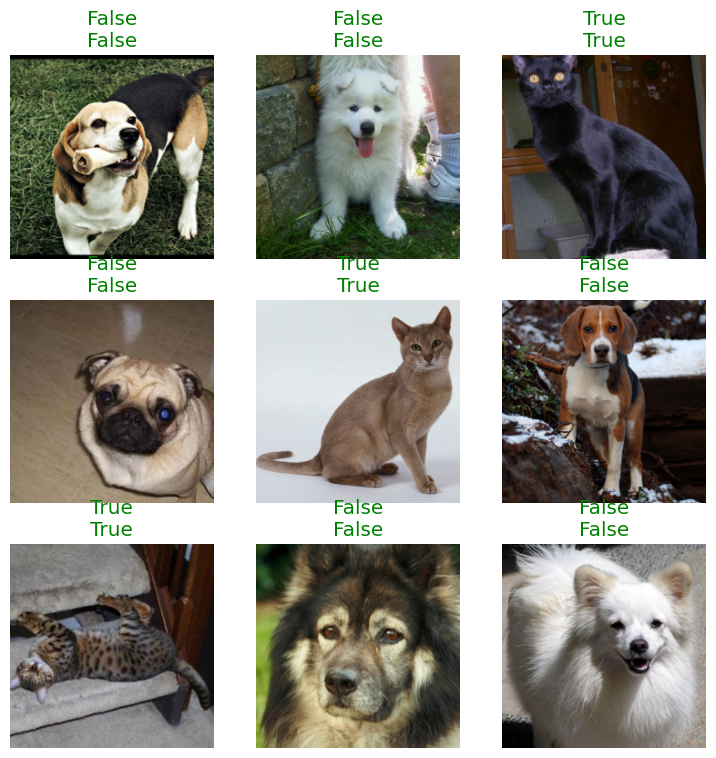

In [62]:
learn.show_results()

In [63]:
import shutil

def categorize_files(input_path, dest_path):
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)
        os.makedirs(os.path.join(dest_path, 'Dog'))
        os.makedirs(os.path.join(dest_path, 'Cat'))
        os.makedirs(os.path.join(dest_path, 'Keanu'))
    files = os.listdir(input_path)  # Adjusted for correct file listing
    for file_name in files:
        full_path = os.path.join(input_path, file_name)
        if file_name[0].isupper(): 
            shutil.copy(full_path, os.path.join(dest_path, 'Cat', file_name))
        else: 
            shutil.copy(full_path, os.path.join(dest_path, 'Dog', file_name))

        

In [64]:
dest_path = Path('/Users/zahrazaredar/Documents/MachineLearning/test-program-with-jaddi/Data/my_images')

In [65]:
categorize_files(image_dir,dest_path)

<Axes: >

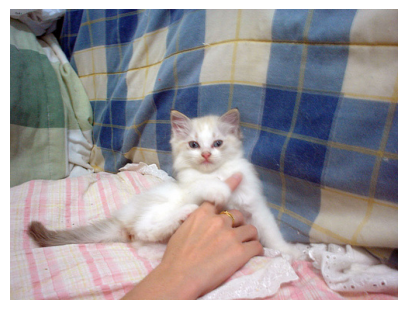

In [66]:
img_path = (dest_path/'Cat').ls()[34]
image = PILImage.create(img_path)
show_image(image)

<Axes: >

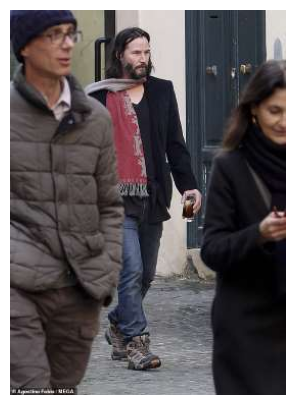

In [71]:
img_path = (dest_path/'Keanu').ls()[10]
image = PILImage.create(img_path)
show_image(image)

In [75]:
def label_func(x):
    return x.parent.name
    
dls = ImageDataLoaders.from_path_func(path = image_dir,
                                      fnames= get_image_files(image_dir), 
                                      seed =42,
                                      item_tfms= Resize(224), 
                                      label_func = label_func,
                                      valid_pct= 0.2 , 
                                      bs = 64)

In [86]:
fnames = get_image_files(destination_path)

In [87]:
fnames[4].parent.name

'Cat'

In [88]:
learn = vision_learner(dls,resnet34, metrics = error_rate)

In [89]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,02:05


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,07:22
